# Data Mining Project 1st Semester 2020/2021

## 1) Introduction

### 1.1) An Understanding

This dataset was provided by the Paralyzed Veterans of America (PVA). The original sample has 95412 rows, meaning that it has 95412 contributors, who have made a previous donation to PVA before.
The objective of this project is to recapture a group of donors that is called "lapsed donors", consisting in a group donors who made their last donation between 13 and 24 months ago.
Therefore, it is going to be developed a Customer Segmentation , so that the company can better interpret and analise the differents groups of donors.
This is very important to do so because it will help to recapture the group of "lapsed donors".


This project was developed using the Jupyter Notebook, to which was created a particular enviroment on Conda. Also, it can be found in a github repository (link: https://github.com/its-pedrofonseca/Data-Mining-Project (still private) ).
It was also created a Trello Chart to better understand the tasks that had to be done, as well as the more demanding tasks and to divide the work for the members. (Trello: https://trello.com/b/UswFQo7V/data-mining)

### 1.2) Setting up Enviroments in Anaconda 

As this project requires specific libraries and packages previously installed, before running the notebook, so that there aren't any external problems, an enviroment in anaconda was created to run this notebook without any problems.
The enviroment file is provided in the github previously referred, as a yml file, then the user will have to download it and run some commands in the anaconda command line...........................................................

### 1.3) Package Importing

In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
#from pandas_profiling import ProfileReport
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

## 2) Importing, Acessing and Cleaning the Data

The model that was followed to develop this project was the KDD Process (Knowledge Discovery Database).

In this phase of the Data Mining Process, it is going to be created a target dataset, which then is going to be discovered.
Following this, some processes of data cleaning and preprocessing are going to be applied, such as removing noise, nans variables, data normalization, collecting only the necessary information to apply the next processes. 
Afterwards, data reduction and projection is going to be applied, finding useful features (with feature engeneering) to represent the data in smaller subsets, dimensionality reduction and/or transformation methods.

Also, along all this processes some data visualization is going to be applied to better understand the data that we are working with.

### 2.1) Reading the Data

The specified file (donors.csv), must be in the same folder as the project

In [15]:
#ver se não se consegue por o ficheiro na git, é demasiado grande acho...
data_original=pd.read_csv("donors.csv")

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

### 2.2) Make a copy of the original dataset


In [17]:
data = data_original.copy()

In [18]:
data.shape

(95412, 476)

In [19]:
#dataset head
data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,

In [20]:
#Dropping the column that is making an index
data.drop(["Unnamed: 0"], axis=1, inplace= True)

In [21]:
# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE        0
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
HOMEOWNR        0
CHILD03         0
CHILD07         0
CHILD12         0
CHILD18         0
NUMCHLD     83026
INCOME      21286
GENDER          0
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE        0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3           0
SOLIH           0
MAJOR           0
WEALTH2     43823
GEOCODE         0
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

In [22]:
# duplicated observations
data.duplicated().sum()

0

In [23]:
# descriptive statistics
data.describe(include="all")

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,95412,95412,95412.000000,95412,95412,95412,95412,71529,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,12386.000000,74126.000000,95412,50680.000000,95412.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412,95412,95412,51589.000000,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000

### 2.3) Normalize Some Values and replacing empty String for Nans

In the columns that have X marked
0 - doesn't have X
1 - have X marked

In [24]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MAJOR,PEPSTRFL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0
95409,0,0,1,0,0,0,1
95410,0,1,0,0,0,0,1


In the columns that have Y marked
0 - N
1 - Y

In [25]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
data["MAILCODE"]=pd.Series(np.where(data["MAILCODE"].values == 'B', 1, 0),data.index)


In [31]:
# replace " " by nans
data.drop(["SOLP3","SOLIH"],axis=1).replace(" ", np.nan, inplace=True)

# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE        0
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
HOMEOWNR        0
CHILD03         0
CHILD07         0
CHILD12         0
CHILD18         0
NUMCHLD     83026
INCOME      21286
GENDER          0
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE        0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3           0
SOLIH           0
MAJOR           0
WEALTH2     43823
GEOCODE         0
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

### 2.4) Dropping Columns with High percentege of missing values

In [32]:
#if a columns has more than half of missing values the column is removed
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

63 columns were removed


In [33]:
data.shape

(95412, 413)

In [454]:
# check dataset data types again
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('int32'), dtype('float64')],
      dtype=object)

In [455]:
#nao se pode fazer cast de int para obj

#data["TCODE"]=data["TCODE"].astype(object)
#data[X_values]=data[X_values].astype(object)
#data[Y_Values]=data[Y_Values].astype(object)

In [457]:
data.dtypes

ODATEDW      object
OSOURCE      object
TCODE        object
STATE        object
ZIP          object
DOB          object
NOEXCH       object
RECINHSE     object
RECP3        object
RECPGVG      object
RECSWEEP     object
MDMAUD       object
DOMAIN       object
HOMEOWNR     object
INCOME      float64
GENDER       object
WEALTH1     float64
HIT           int64
DATASRCE     object
MALEMILI      int64
MALEVET       int64
VIETVETS      int64
WWIIVETS      int64
LOCALGOV      int64
STATEGOV      int64
FEDGOV        int64
MAJOR        object
WEALTH2     float64
COLLECT1     object
VETERANS     object
BIBLE        object
CATLG        object
HOMEE        object
PETS         object
CDPLAY       object
STEREO       object
PCOWNERS     object
PHOTO        object
CRAFTS       object
FISHER       object
GARDENIN     object
BOATS        object
WALKER       object
KIDSTUFF     object
CARDS        object
PLATES       object
PEPSTRFL     object
POP901        int64
POP902        int64
POP903        int64


### 2.5) Defining metric and non-metric features

In [458]:
# Define metric and non-metric features
#non_metric_features = data.select_dtypes(include="object").columns.to_list()
#metric_features = data.columns.drop(non_metric_features).to_list()

In [459]:
#data[non_metric_features].shape
#fazer graficos aqui
#histograms
# absolute freqs

(95412, 88)

### 2.6) Delete columns with same values


In [35]:
old_non_metric_feat = list(data[non_metric_features].columns)

In [36]:
#Remove columns that only have one elements as its variable thus it wouldnt give any new information
remover=[]

def del_columns_with_one_elem(lista):
    for i in range(len(lista)):
        #print(lista[i])
        if len(set(data[lista[i]])) == 1:
            #print(len(set(data[lista[i]])))
            remover.append(lista[i])   
    for r in remover:
        lista.remove(r)


In [38]:
del_columns_with_one_elem(non_metric_features)
print("Deleted Column/s:", (set(old_non_metric_feat).difference(list(data[non_metric_features].columns)))) 

AttributeError: 'Index' object has no attribute 'remove'

### 2.7) Fill missing values (Data imputation)


In [468]:
# Creating a copy to apply central tendency measures imputation
data_central = data.copy()

In [469]:
modes = data_central[non_metric_features].mode().loc[0]
modes.head(10)
#nao há missing values/nans para as metric features??
#nao deveriamos usar o KnnImputer?

ODATEDW     2015-01-01
OSOURCE            MBC
TCODE                0
STATE               CA
ZIP              85351
DOB         1968-01-01
NOEXCH               0
RECINHSE             0
RECP3                0
RECPGVG              0
Name: 0, dtype: object

In [470]:
# checking how many NaNs we still have
data_central.fillna(data_central.median(), inplace=True)
data_central.fillna(modes, inplace=True)
data_central.isna().sum().sum()

0

In [471]:
#lets keep the central imputation
data = data_central.copy()

### 2.8) Feature Grouping

In [39]:
data_corr = data.corr()

corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.85] 
corrdata =corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()

corrdata.columns = ["Features1","Features2","corr_value"]
len(corrdata.Features2.unique())

129

In [40]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [41]:
#Example for the first element of correlation the other features that also correlate

for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)

In [42]:
#List of elements that present correlation between themselves, without repeated features

correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)

In [476]:
#for c in correlated_group:
#    print(c)

In [477]:
data.drop(['HHAGE1','HHAGE3','AGEC6','ETHC3'], axis=1, inplace=True)

In [478]:
# ficar com 
data.drop(['HV1','HVP1','HVP2','HVP6'], axis=1, inplace=True)

In [479]:
# dar drop a blacks com 15-59,blacks >15, percent blacks total e ficar com nada (faz-se com idade depois)
data.drop(['ETHC5','ETH2','ETHC4'], axis=1, inplace=True)

In [480]:
# dar drop a num of persons e households e ficar com o numero de familias no bairro
data.drop(['POP901','POP903'], axis=1, inplace=True)

In [481]:
# dar drop a female household w childen e ficar com single parents household
data.drop(['HHD9'], axis=1, inplace=True)

In [482]:
# dar drop a female e adult females in labor force e ficar com adults in labor force
data.drop(['LFC5','LFC3'], axis=1, inplace=True)

In [483]:
#drop de males actine in military e ficar com o total adults actine in military
data.drop(['AFC2'], axis=1, inplace=True)

In [484]:
#escolher average age of population
data.drop(['AGE906','AGE905','AGE903','AGE902'], axis=1, inplace=True)

In [485]:
#escolher mediana e media da income das familias
data.drop(['IC1','IC3'], axis=1, inplace=True)

In [486]:
# ficar com percent house units c/ mais de 10 casas/units na morada
data.drop(['DW4','DW5','DW6','HUPA6'], axis=1, inplace=True)

In [487]:
## dar drop a male e adult males in labor force e ficar com adults in labor force
data.drop(['LFC4','LFC2'], axis=1, inplace=True)

In [488]:
#ficar com media de numeros de quartos por casas
data.drop(['RHP1','HUR2'], axis=1, inplace=True)

In [489]:
# percentagem de familias com income >=150000
data.drop(['IC14'], axis=1, inplace=True)

In [490]:
# ficar com a media de numero de pessoas por casa (rever)
data.drop(['HHP1','RHP3','HHN3','HHN4','HHD1','HHD2'], axis=1, inplace=True)

In [491]:
# ficar com a percentagem de hispanics
data.drop(['LSC2','ETH13'], axis=1, inplace=True)

In [492]:
# ficar com percentagem de pessoas empregues na agricultura
data.drop(['OCC9'], axis=1, inplace=True)

In [493]:
# ficar com percentagem de familias com income entre os 75000 e 99999
data.drop(['IC11'], axis=1, inplace=True)

In [494]:
#escolher average age of population
data.drop(['AGE901'], axis=1, inplace=True)

In [495]:
#ficar com Percent Single Unit Structure
data.drop(['DW2'], axis=1, inplace=True)

In [496]:
#ficar com Percent Adult Veterans Age 16+
data.drop(['AFC5'], axis=1, inplace=True)

In [497]:
#ficar com Percent Families w/ Income $50,000 - $74,999 IC19
data.drop(['IC10'], axis=1, inplace=True)

In [498]:
#ficar com Percent Families w/ Income $100,000 - $124,999 IC21
data.drop(['IC12'], axis=1, inplace=True)

In [499]:
# ficar com NUMPROM
data.drop(['CARDPROM'], axis=1, inplace=True)

In [500]:
#ficar com Average Contract Rent in hundreds
data.drop(['HV3','RP1'], axis=1, inplace=True)

In [501]:
# features nao importantes
data.drop(['HC18','HC17','HC7','HC8','HC6'], axis=1, inplace=True)

In [502]:
# Percent Families w/ Income $125,000 - $149,999
data.drop(['IC13'], axis=1, inplace=True)

In [503]:
#ficar com Percent Persons Enrolled in Elementary or High School
data.drop(['AGE907'], axis=1, inplace=True)

In [504]:
#ficar com a percentagem de casamentos
data.drop(['HHD3'], axis=1, inplace=True)

In [505]:
#ficar com HV4
data.drop(['RP2','RP3'], axis=1, inplace=True)

In [506]:
#ficar com NGIFTALL
data.drop(['CARDGIFT'], axis=1, inplace=True)

In [507]:
#ficar com adultos com +75 anos
data.drop(['MARR3','HHAGE2'], axis=1, inplace=True)

In [508]:
#ficar com a mediana de pessoas numa casa HHP1
data.drop(['HHD4'], axis=1, inplace=True)

In [510]:
#drop de vars com percentagem de 5 ou mais pessoas por household
data.drop(['HHN5', 'HHN6'], axis=1, inplace=True)

In [511]:
data.drop(['HHD11'], axis=1, inplace=True)

In [512]:
data.drop(['HU2'], axis=1, inplace=True)

In [513]:
data.drop(['IC15','IC6'], axis=1, inplace=True)

In [514]:
data.drop(['HC4','HC5'], axis=1, inplace=True)

In [515]:
data.drop(['IC9'], axis=1, inplace=True)

In [516]:
data.drop(['IC5','IC2'], axis=1, inplace=True)

In [517]:
data.drop(['IC7'], axis=1, inplace=True)

In [518]:
data.drop(['ETH4'], axis=1, inplace=True)

In [519]:
data.drop(['HC20','HC21'], axis=1, inplace=True)

In [520]:
data.drop(['CHILC1'], axis=1, inplace=True)

In [521]:
data.drop(['STATEGOV'], axis=1, inplace=True)

In [522]:
data.drop(['IC8'], axis=1, inplace=True)

In [523]:
data.drop(['HUPA5','HUPA1'], axis=1, inplace=True)

In [524]:
data.drop(['HVP3','HVP4','HVP5'], axis=1, inplace=True)

In [525]:
data.shape

(95412, 312)

In [526]:
data["TCODE"]=data["TCODE"].astype(object)
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

In [527]:
data[metric_features].shape

(95412, 249)

In [528]:
data[metric_features].head()
#confirmar se do noexch até ao recsweep, major, collect1 ate PEPSTRFL 
#não sao vars nao numericas
#nao deveriam ser variaveis categoricas? mesmo depois de converter
# 

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,FEDGOV,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP902,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH3,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,AGE904,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC7,CHILC2,CHILC3,CHILC4,CHILC5,HHN1,HHN2,MARR1,MARR2,MARR4,HHP2,DW1,DW3,DW7,DW8,DW9,HV2,HV4,HU1,HU3,HU4,HU5,HHD5,HHD6,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC6,HUR1,RHP2,RHP4,HUPA2,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC4,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC3,AFC4,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC19,MHUC1,MHUC2,AC1,AC2,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
0,0,0,0,0,0,4.0,6.0,0,0,39,34,18,10,1,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,264,0,35,65,47,53,92,0,11,0,0,0,0,0,0,0,0,0,0,40,31,42,27,11,14,18,17,13,15,11,34,25,18,18,33,61,7,19,276,97,2,7,7,0,635,2,86,96,4,7,84,16,6,2,9,3,17,50,0,1,61,4,0,0,14,0,73,0.0,177.0,682.0,378,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,4,1,13,14,16,2,45,56,62,53,99,0,0,9,3,8,13,9,0,3,9,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,18,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,0,4,96,77,19,13,31,5,0,0,90,0,10,0,0,0,40,6,2,10,7,74,6,14,240.0,31,5.0,12.0,10.0,4.0,7.741935,95515,0,4
1,0,0,0,0,0,6.0,9.0,16,0,15,55,11,6,1,0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,940,99,0,0,50,50,67,0,6,4,2,6,4,14,0,0,0,1,4,32,33,46,21,13,14,33,23,10,2,16,36,22,15,4,21,69,4,24,360,99,0,0,0,0,5218,10,96,97,3,9,95,5,4,1,5,2,18,44,0,0,73,5,0,0,4,0,94,4480.0,13.0,803.0,1037,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,6,0,2,24,32,12,71,70,64,57,99,99,0,22,24,4,21,13,2,1,6,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,8,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,27,16,99,92,53,5,10,2,0,0,96,0,4,0,0,0,99,20,4,6,5,32,6,13,47.0,3,10.0,25.0,25.0,18.0,15.666667,148535,0,2
2,0,0,0,0,0,3.0,1.0,2,0,20,29,33,6,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2040,0,2,98,49,51,96,0,2,0,0,0,0,0,0,0,0,0,0,37,35,40,25,13,20,19,16,13,8,14,30,22,19,21,35,63,9,19,254,69,1,3,3,0,546,1,78,93,7,18,86,14,7,2,11,3,17,60,0,4,51,5,2,24,11,6,44,0.0,281.0,518.0,340,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,2,2,1,21,19,24,6,61,65,78,62,82,99,4,10,5,2,6,12,0,1,9,18,20,5,7,6,0,11,33,4,3,2,12,3,3,2,0,7,8,3,3,6,7,1,8,74,3,1,120,22,20,28,16,6,5,3,1,23,1,16,6,0,0,10,0,28,23,32,8,1,14,1,5,0,0,7,0,0,0,0,0,1,0,0,2,84,96,0,0,92,65,29,9,22,3,0,0,0,6,35,44,0,15,17,9,2,6,5,63,6,14,202.0,27,2.0,16.0,5.0,12.0,7.481481,15078,1,4
3,0,0,0,0,0,1.0,4.0,2,0,23,14,31,3,3,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,160,0,8,92,54,46,61,0,32,6,2,0,0,0,0,0,0,0,1,34,45,35,20,15,25,17,17,12,7,17,30,14,19,23,27,63,9,23,283,85,3,2,0,2,1263,1,48,93,7,6,84,16,6,3,21,4,13,36,0,15,50,5,0,9,42,5,34,9340.0,67.0,862.0,423,5,6,12,30,6,0,0,5,22,14,26,20,46,54,3,58,36,0,0,0,0,6,0,0,17,13,15,0,43,69,33,31,0,99,23,17,3,0,6,6,0,0,13,12,0,0,0,42,0,6,3,0,0,0,23,3,3,6,0,3,3,3,3,3,0,3,6,87,0,0,120,28,12,14,27,10,3,5,0,19,1,17,0,0,0,13,0,14,40,31,16,0,1,0,13,0,0,4,0,0,0,3,0,0,0,0,29,67,56,3,0,94,43,27,4,38,0,0,0,45,22,17,0,0,16,22,16,2,6,6,66,6,14,109.0,16,2.0,11.0,10.0,9.0,6.812500,172556

In [529]:
data[non_metric_features].shape

(95412, 63)

In [530]:
data[non_metric_features].head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,MDMAUD,DOMAIN,HOMEOWNR,GENDER,DATASRCE,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,XXXX,T2,H,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,2012-08-01,2014-02-01,2015-12-01,2009-11-01,2010-03-01,L,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,1972-02-01,XXXX,S1,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,L1E,A1E,A1E,N1E,N1E,N1E,F1E,2017-02-01,2013-10-01,2015-12-01,2015-12-01,2013-10-01,2015-04-01,L,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,1968-01-01,XXXX,R2,U,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,A1F,S4F,S4F,S4F,S4F,S4F,A1E,S4D,S4D,A1E,S4D,S3D,2017-02-01,2011-11-01,2012-07-01,2015-12-01,2010-01-01,2011-01-01,L,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,1948-01-01,XXXX,R2,U,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,A1F,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1E,2017-02-01,2007-11-01,2014-11-01,2015-12-01,2007-02-01,2007-11-01,L,E,X,X,X,C
4,2006-01-01,MBC,0,FL,33176,1940-01-01,XXXX,S2,H,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2015-12-01,2016-01-01,2015-11-01,2015-10-01,2015-09-01,2015-08-01,2015-02-01,2015-06-01,2015-03-01,2015-02-01,2014-12-01,2014-11-01,2014-10-01,2015-06-01,2014-06-01,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,L3D,A2D,A2D,A3D,A3D,I4E,A3D,2017-02-01,2013-10-01,2016-01-01,2016-01-01,1999-03-01,2000-05-01,L,F,X,X,X,A


### 2.9) Outlier Removal

In [531]:
data_out = data.copy()
data_out.shape

(95412, 312)

In [532]:
#Isto não está a funcionar
ql = data_out.quantile(.005)
qh = data_out.quantile(.995)
iqr = (qh - ql)

#podia-se fazer a visualizacao dos outliers com a box plot...

upper_lim = qh + 1.5 * iqr
lower_lim = ql - 1.5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(data_out[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
data_out = data[filters]
#print('Percentage of data kept after removing outliers:', np.round(data_out.shape[0] / data_original.shape[0], 4))
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_out.shape[0] / data_original.shape[0], 4),3)*100, "%")

Percentage of data removed after outliers: 3.2 %


In [533]:
#Combinar diferentes metodos de outliers para que a decisão seja mais robusta
#deve - se retirar no maximo ate 3 %, se nao a data fica corrompida
#pode-se usar metodos pessoais, iqr outliers, zscore

In [534]:
data_out.shape

(92316, 312)

In [535]:
#using the z-score
#from scipy import stats

#z = np.abs(stats.zscore(data_out))
#z.head()

In [536]:
data = data_out
data.shape

(92316, 312)

### 2.10) Feature Engeneering

Variable selection: Redundancy VS Relevancy

Redundancy

Correlation matrix...

Relevancy

Selecting variables based on the relevancy of each one to the task. Example: remove uncorrelated variables with the target, stepwise regression, use variables for product clustering, use variables for socio-demographic clustering
Variables that aren't correlated with any other variable are often also not relevant. In this case we will not focus on this a lot since we don't have a defined task yet.

In [537]:
data_feat = data.copy()


In [538]:
#ODATEDW E FISTDATE sao iguais, ambas se referem a data do primeiro gift e nos preferimos ficar com a FISTDATE
data_feat.drop(["ODATEDW"], axis=1, inplace=True)

In [539]:
# Como não sabemos o que significa é irrelevante
data_feat.drop(["OSOURCE"], axis=1, inplace=True)

In [540]:
# É irrelevante
data_feat.drop(["TCODE"], axis=1, inplace=True)

In [541]:
# É irrelevante e não sabemos o que significa (ainda não sabemos bem)
data_feat.drop(["NOEXCH"], axis=1, inplace=True)

In [542]:
#Irrelevante
data_feat.drop(["RECINHSE","RECP3","RECPGVG","RECSWEEP"], axis=1, inplace=True)

In [543]:
#Irrelvante saber se tem casa
data_feat.drop(["HOMEOWNR"], axis=1, inplace=True)

In [544]:
# Irrelevante saber por que third party data source foi matched
data_feat.drop(["DATASRCE"], axis=1, inplace=True)

In [545]:
# pode ser relevante, como pode nao ser...
data_feat.drop(["MALEMILI","MALEVET","VIETVETS","WWIIVETS","LOCALGOV","FEDGOV"], axis=1, inplace=True)

# relativamente a variavel SOLP3, que nao está aqui, quando o espaço está em branco é o 
#default e nos fazemos substituicao de brancos por nans pra depois apagar....

In [546]:
data_feat.drop(["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY",
                "STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS",
                "WALKER","KIDSTUFF","CARDS","PLATES"], axis=1, inplace=True)

In [547]:
data_feat.drop(["PEPSTRFL"], axis=1, inplace=True)

In [548]:
data_feat.drop(["CHIL1","CHIL2","CHIL3"], axis=1, inplace=True)

In [549]:
data_feat.drop(["AGEC1","AGEC2","AGEC3","AGEC4","AGEC5","AGEC7","CHILC2","CHILC3","CHILC4","CHILC5"], axis=1, inplace=True)

In [554]:
data_feat.drop(["HHN1","HHN2"], axis=1, inplace=True)

In [555]:
data_feat.drop(["DW1","DW3","DW7","DW8","DW9"], axis=1, inplace=True)

In [556]:
data_feat.drop(["HU1","HU3","HU4","HU5"], axis=1, inplace=True)

In [557]:
data_feat.drop(["ETHC1","ETHC2","ETHC6"], axis=1, inplace=True)

In [560]:
data_feat.drop(["HUPA2","HUPA3","HUPA4","HUPA7"], axis=1, inplace=True)

KeyError: "['HUPA2' 'HUPA3' 'HUPA4' 'HUPA7'] not found in axis"

In [425]:
data_feat.drop(["RP4"], axis=1, inplace=True)

In [426]:
data_feat.drop(["MSA","ADI","DMA"], axis=1, inplace=True)

In [427]:
data_feat.drop(["MC1","MC2","MC3"], axis=1, inplace=True)

In [428]:
data_feat.drop(["TPE1","TPE2","TPE3","TPE4","TPE5","TPE6","TPE7","TPE8"
                ,"TPE9","TPE10","TPE11","TPE12","TPE13"], axis=1, inplace=True)

In [429]:
data_feat.drop(["LFC1","LFC6","LFC7","LFC8","LFC9","LFC10"], axis=1, inplace=True)

In [430]:
data_feat.drop(["OCC1","OCC2","OCC3","OCC4","OCC5","OCC6","OCC7"
                ,"OCC8","OCC10","OCC11","OCC12","OCC13"], axis=1, inplace=True)

In [431]:
data_feat.drop(["SEC3","SEC4"], axis=1, inplace=True)

In [432]:
data_feat.drop(["AFC3","AFC4","AFC6"], axis=1, inplace=True)

In [433]:
data_feat.drop(["VC1","VC2","VC3","VC4"], axis=1, inplace=True)

In [434]:
data_feat.drop(["ANC1","ANC2","ANC3","ANC4","ANC5","ANC6","ANC7",
                "ANC8","ANC9","ANC10","ANC11","ANC12","ANC13","ANC14","ANC15"], axis=1, inplace=True)

In [435]:
data_feat.drop(["VOC1","VOC2","VOC3"], axis=1, inplace=True)

In [436]:
data_feat.drop(["HC2","HC3","HC9","HC10","HC11","HC12","HC13","HC14","HC15","HC16","HC19"], axis=1, inplace=True)

In [439]:
data_feat.head()

,STATE,ZIP,DOB,MDMAUD,DOMAIN,INCOME,GENDER,WEALTH1,HIT,MAJOR,WEALTH2,POP902,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH3,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,AGE904,MARR1,MARR2,MARR4,HHP2,HV2,HV4,HHD5,HHD6,HHD7,HHD8,HHD10,HHD12,RHP2,RHP4,IC4,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,PEC1,PEC2,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC5,AFC1,POBC1,POBC2,LSC1,LSC3,LSC4,HC1,MHUC1,MHUC2,AC1,AC2,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,IL,61081,1957-12-01,XXXX,T2,4.0,F,6.0,0,0,5.0,264,0,35,65,47,53,92,0,11,0,0,0,0,0,0,0,0,0,0,40,61,7,19,276,635,2,84,16,6,2,9,3,61,4,378,25,24,26,17,2,0,0,2,28,4,51,1,1,13,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,4,0,3,74,88,0,4,13,6,2,10,7,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,74,6,14,240.0,31,5.0,2012-08-01,12.0,2014-02-01,10.0,2015-12-01,2009-11-01,2010-03-01,4.0,7.741935,95515,0,L,4,E,X,X,X,C
1,CA,91326,1972-02-01,XXXX,S1,6.0,M,9.0,16,0,9.0,940,99,0,0,50,50,67,0,6,4,2,6,4,14,0,0,0,1,4,32,69,4,24,360,5218,10,95,5,4,1,5,2,73,5,1037,5,2,5,15,14,14,10,32,6,2,66,3,0,2,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,10,0,42,39,50,27,16,5,20,4,6,5,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,L1E,A1E,A1E,N1E,N1E,N1E,F1E,2017-02-01,32,6,13,47.0,3,10.0,2013-10-01,25.0,2015-12-01,25.0,2015-12-01,2013-10-01,2015-04-01,18.0,15.666667,148535,0,L,2,G,X,X,X,A
2,NC,27017,1968-01-01,XXXX,R2,3.0,M,1.0,2,0,1.0,2040,0,2,98,49,51,96,0,2,0,0,0,0,0,0,0,0,0,0,37,63,9,19,254,546,1,86,14,7,2,11,3,51,5,340,19,24,18,16,2,0,0,1,28,8,31,11,1,21,6,0,11,33,4,3,2,12,3,3,2,0,7,8,3,3,6,7,1,8,74,3,1,120,22,20,28,16,6,5,3,1,23,6,0,2,84,96,0,0,9,9,2,6,5,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,A1F,S4F,S4F,S4F,S4F,S4F,A1E,S4D,S4D,A1E,S4D,S3D,2017-02-01,63,6,14,202.0,27,2.0,2011-11-01,16.0,2012-07-01,5.0,2015-12-01,2010-01-01,2011-01-01,12.0,7.481481,15078,1,L,4,E,X,X,X,C
3,CA,95953,1948-01-01,XXXX,R2,1.0,F,4.0,2,0,0.0,160,0,8,92,54,46,61,0,32,6,2,0,0,0,0,0,0,0,1,34,63,9,23,283,1263,1,84,16,6,3,21,4,50,5,423,5,6,12,30,6,0,0,5,22,14,26,20,0,17,42,0,6,3,0,0,0,23,3,3,6,0,3,3,3,3,3,0,3,6,87,0,0,120,28,12,14,27,10,3,5,0,19,0,0,29,67,56,3,0,4,16,2,6,6,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,A1F,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1E,2017-02-01,66,6,14,109.0,16,2.0,2007-11-01,11.0,2014-11-01,10.0,2015-12-01,2007-02-01,2007-11-01,9.0,6.812500,172556,1,L,4,E,X,X,X,C
4,FL,33176,1940-01-01,XXXX,S2,3.0,F,2.0,60,0,5.0,627,99,0,0,46,54,2,0,1,0,0,0,0,0,0,0,0,0,0,36,42,17,33,323,594,3,92,8,20,3,9,1,53,6,321,30,22,16,4,5,0,0,3,35,8,11,14,2,1,2,0,6,1,5,2,2,12,2,7,6,4,15,29,4,3,26,3,2,7,49,12,1,120,16,20,30,13,3,12,5,2,26,7,1,1,65,99,0,0,25,6,2,7,11,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,L3D,A2D,A2D,A3D,A3D,I4E,A3D,2017-02-01,113,10,25,254.0,37,3.0,2013-10-01,15.0,2016-01-01,15.0,2016-01-01,1999-03-01,2000-05-01,14.0,6.864865,7112,1,L,2,F,X,X,X,A


In [438]:
data_feat.drop([], axis=1, inplace=True)

KeyError: "['ADATE_2' 'ADATE_3' 'ADATE_4' 'ADATE_5' 'ADATE_6' 'ADATE_7' 'ADATE_8'\n 'ADATE_9' 'ADATE_10' 'ADATE_11' 'ADATE_12' 'ADATE_13' 'ADATE_14'\n 'ADATE_16' 'ADATE_17' 'ADATE_18' 'ADATE_19' 'ADATE_21' 'ADATE_22'\n 'ADATE_24'] not found in axis"

In [405]:
data_feat.drop(["RDATE_2","RDATE_3","RDATE_4","RDATE_5","RDATE_6","RDATE_7","RDATE_8","RDATE_9","RDATE_10",
           "RDATE_11","RDATE_12","RDATE_13","RDATE_14","RDATE_16","RDATE_17","RDATE_18","RDATE_19",
           "RDATE_21","RDATE_22","RDATE_24"],axis=1, inplace=True)

KeyError: "['RDATE_2' 'RDATE_3' 'RDATE_4' 'RDATE_5' 'RDATE_6' 'RDATE_7' 'RDATE_8'\n 'RDATE_9' 'RDATE_10' 'RDATE_11' 'RDATE_12' 'RDATE_13' 'RDATE_14'\n 'RDATE_16' 'RDATE_17' 'RDATE_18' 'RDATE_19' 'RDATE_21' 'RDATE_22'\n 'RDATE_24'] not found in axis"

In [ ]:
#mandar ethc embora??

In [ ]:
#dar drop aos hc??

In [110]:
data.shape

(95412, 286)

In [111]:
data.drop(["ADATE_2","ADATE_3","ADATE_4","ADATE_5","ADATE_6","ADATE_7","ADATE_8","ADATE_9","ADATE_10",
           "ADATE_11","ADATE_12","ADATE_13","ADATE_14","ADATE_16","ADATE_17","ADATE_18","ADATE_19",
           "ADATE_21","ADATE_22","ADATE_24"], axis=1, inplace=True)

In [112]:
data.shape

(95412, 266)

In [53]:
data.drop( ["RDATE_2","RDATE_3","RDATE_4","RDATE_5","RDATE_6","RDATE_7","RDATE_8","RDATE_9","RDATE_10",
           "RDATE_11","RDATE_12","RDATE_13","RDATE_14","RDATE_16","RDATE_17","RDATE_18","RDATE_19",
           "RDATE_21","RDATE_22","RDATE_24"],
             axis=1, inplace=True)

In [54]:
data.shape

(95412, 243)

In [119]:
race_percentage = data.loc[:len(data), ['ETH3', 'ETH4', 'ETH6', 'ETH7', 'ETH8',
                           'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH14', 'ETH15', 'ETH16']]

In [121]:
print(data[metric_features].columns[0:50])

Index(['INCOME', 'WEALTH1', 'HIT', 'MALEMILI', 'MALEVET', 'WEALTH2', 'POP901',
       'POP90C1', 'POP90C2', 'POP90C4', 'ETH3', 'ETH4', 'ETH6', 'ETH7', 'ETH8',
       'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH14', 'ETH15', 'ETH16', 'CHIL1',
       'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'CHILC4',
       'CHILC5', 'HHN2', 'HHN6', 'MARR2', 'MARR4', 'DW4', 'DW7', 'DW8', 'DW9',
       'HU3', 'HU4', 'HU5', 'HHD7', 'HHD8', 'HHD10', 'HHD12', 'ETHC1', 'ETHC2',
       'ETHC5'],
      dtype='object')


### 2.11) Data Standardization

In [50]:
standard = data.copy()

In [51]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(standard[metric_features])
scaled_feat

array([[-1.91563249e-02, -2.74884827e-01, -1.46957290e-01, ...,
        -4.76042798e-03, -1.00123751e+00,  1.94822609e+00],
       [-1.91563249e-02, -2.74884827e-01, -1.46957290e-01, ...,
         9.54282083e-01, -1.00123751e+00,  8.38474084e-02],
       [-1.91563249e-02, -2.74884827e-01, -1.46957290e-01, ...,
        -1.45973030e+00,  9.98764022e-01,  1.94822609e+00],
       ...,
       [-1.91563249e-02, -2.74884827e-01,  6.80469813e+00, ...,
         1.69782040e+00,  9.98764022e-01,  1.01603675e+00],
       [-1.91563249e-02,  3.63788723e+00, -1.46957290e-01, ...,
        -1.64757746e+00,  9.98764022e-01,  1.94822609e+00],
       [-1.91563249e-02,  3.63788723e+00, -1.46957290e-01, ...,
         1.61593459e+00,  9.98764022e-01, -8.48341933e-01]])

In [52]:
standard[metric_features] = scaled_feat
standard.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP90C1,POP90C2,POP90C4,ETH3,ETH4,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHN2,HHN6,MARR2,MARR4,DW4,DW7,DW8,DW9,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC5,HVP1,HVP5,HUR1,RHP1,RHP4,HUPA3,HUPA4,HUPA5,HUPA7,RP4,MSA,ADI,DMA,IC1,IC6,IC9,IC10,IC14,IC16,IC17,IC22,HHAS1,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC1,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC2,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,MINRDATE,MAXRAMNT,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,-0.019156,-0.274885,-0.146957,-0.034587,-0.1313,XXXX,T2,H,0.054029,F,0.171607,-0.356881,3,-0.206977,0.745798,-0.055596,0.011930,-0.240136,-0.350256,-0.320166,-0.299729,-0.09687,-0.420329,-0.383872,-0.393519,-0.351292,-0.229805,-0.306142,-0.28419,-0.404251,-0.147366,-0.351668,-0.127914,-0.105028,-0.076837,1.052458,-0.394185,-1.235273,0.684696,-0.217719,-0.223937,-0.411007,-0.318003,-0.178012,-0.241859,-0.243155,-0.249707,-0.199512,-0.058468,-0.233968,-0.102047,-0.449775,-1.043796,0.570857,1.027129,-0.197237,-1.051630,-0.427141,0.681650,0.275532,1.149868,0.486159,-0.076580,0.027298,-0.816497,-0.444526,-0.732814,0.882053,1.372488,-0.156494,0.465714,-0.519690,-0.321105,-0.353743,0.334768,-0.648917,-0.442066,0.035937,-0.054125,-0.453938,-0.435249,-0.909136,-0.510811,0.471801,-0.331514,-0.593674,0.364485,-0.565689,-0.533671,-0.145106,-1.232565,-0.075511,0.155099,-0.202946,-0.585640,0.626834,-0.098231,-0.191477,0.989500,0.990253,-0.483565,0.089193,-0.338264,0.471262,-0.147841,-0.904544,0.895769,-0.746148,-0.429073,-0.206928,-0.138679,-0.343702,-0.741218,0.202299,-0.203281,-0.278098,-1.164948,-0.618802,-0.864418,-0.627254,-0.128786,0.243106,0.939209,-1.401205,-0.717487,-0.622342,-1.344233,1.738274,0.107748,-1.133843,-0.421214,0.718882,-0.256270,0.028142,0.618443,2.160262,0.306458,0.086618,-0.292224,-0.827599,2.363671,-1.024576,-1.162464,0.849349,-0.634092,-0.184685,0.103889,-1.018332,1.099332,0.211809,-0.756187,-1.258025,-0.388224,0.700961,-0.528229,-0.525493,-0.191628,0.685501,-0.938287,-0.480644,-0.452344,0.873309,-0.374350,1.001517,0.029293,0.428334,-1.034951,0.332656,-0.27016,0.81935,-0.495530,-0.216497,0.737899,-0.780437,0.235691,0.521963,-0.901694,0.437362,0.122217,-0.344714,-0.636455,1.550839,-0.269449,-0.333052,0.045006,-0.322441,-0.362632,-0.462590,-0.193820,-0.277806,-0.743523,1.007809,-0.201563,-0.375798,0.779032,0.014260,0.167262,0.121198,0.336945,-0.093485,1.536476,0.402294,0.093516,0.315814,-0.356914,-0.385986,1.069709,-0.569963,-0.707898,-0.471679,-0.143765,-0.509344,1.866657,-0.598374,-0.382472,1.454234,0.313229,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01

In [53]:
# Checking mean and variance of standardized variables
standard[metric_features].describe().round(2)

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP90C1,POP90C2,POP90C4,ETH3,ETH4,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHN2,HHN6,MARR2,MARR4,DW4,DW7,DW8,DW9,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC5,HVP1,HVP5,HUR1,RHP1,RHP4,HUPA3,HUPA4,HUPA5,HUPA7,RP4,MSA,ADI,DMA,IC1,IC6,IC9,IC10,IC14,IC16,IC17,IC22,HHAS1,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC1,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC2,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,MHUC1,MHUC2,AC1,AC2,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,MAXRAMNT,TIMELAG,CONTROLN,HPHONE_D,RFA_2F
count,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.0,95412.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00

In [54]:
data = standard.copy()

### 2.12) One-hot encoding

In [55]:
df_ohc =  data.copy()

In [56]:
df_ohc[non_metric_features]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,MDMAUD,DOMAIN,HOMEOWNR,GENDER,DATASRCE,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,XXXX,T2,H,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,2012-08-01,2014-02-01,2015-12-01,2009-11-01,2010-03-01,L,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,1972-02-01,XXXX,S1,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,L1E,A1E,A1E,N1E,N1E,N1E,F1E,2017-02-01,2013-10-01,2015-12-01,2015-12-01,2013-10-01,2015-04-01,L,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,1968-01-01,XXXX,R2,U,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,A1F,S4F,S4F,S4F,S4F,S4F,A1E,S4D,S4D,A1E,S4D,S3D,2017-02-01,2011-11-01,2012-07-01,2015-12-01,2010-01-01,2011-01-01,L,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,1948-01-01,XXXX,R2,U,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,A1F,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1E,2017-02-01,2007-11-01,2014-11-01,2015-12-01,2007-02-01,2007-11-01,L,E,X,X,X,C
4,2006-01-01,MBC,0,FL,33176,1940-01-01,XXXX,S2,H,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2015-12-01,2016-01-01,2015-11-01,2015-10-01,2015-09-01,2015-08-01,2015-02-01,2015-06-01,2015-03-01,2015-02-01,2014-12-01,2014-11-01,2014-10-01,2015-06-01,2014-06-01,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,L3D,A2D,A2D,A3D,A3D,I4E,A3D,2017-02-01,2013-10-01,2016-01-01,2016-01-01,1999-03-01,2000-05-01,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,1,AK,99504,1968-01-01,XXXX,C2,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-01-01,2015-12-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L1G,F1G,F1G,A1F,F1G,P1G,P1G,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,2017-02-01,2016-02-01,2016-02-01,2016-02-01,2016-02-01,2015-04-01,L,G,X,X,X,C
95408,2016-01-01,DCD,1,TX,77379,1970-01-01,XXXX,C1,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-01-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L1F,A1F,A1F,A1F,A1F,P1F,P1F,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,2017-02-01,2016-03-01,2016-03-01,2016-03-01,2016-03-01,2015-04-01,L,F,X,X,X,A
95409,2015-01-01,MBC,1,MI,48910,1958-01-01,XXXX,C3,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,20

In [57]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
#ohc = OneHotEncoder(sparse=False, drop="first")
#ohc_feat = ohc.fit_transform(df_ohc[non_metric_features].astype(str))
#ohc_feat_names = ohc.get_feature_names()
#ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
#ohc_df

### 2.13) Dimensionality Reduction

In [58]:
df_pca = data.copy()

In [59]:
# Use PCA to reduce dimensionality of data
#pca = PCA()
#pca_feat = pca.fit_transform(df_pca[metric_features])
#pca_feat

In [60]:
#cov_matrix = df_pca[metric_features].cov()
#cov_matrix

In [61]:
# Composing back the covariance matrix
#pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
#             index=cov_matrix.index, 
#             columns=cov_matrix.columns)

In [62]:
# Obtaining the projected observations on the principal components axes (linear combinations)
#pd.DataFrame(df_pca[metric_features].values @ pca.components_.T, 
#             index=df_pca.index,
#             columns=[f"PC{i}" for i in range(pca.n_components_)])

In [63]:
#pd.DataFrame(
#    {"Eigenvalue": pca.explained_variance_,
#     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
#     "Proportion": pca.explained_variance_ratio_,
#     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
#    index=range(1, pca.n_components_ + 1)
#)

In [72]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=3)
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1,PC2
0,1.614987,-3.582554,-0.858752
1,-11.660491,3.003662,-0.787998
2,5.089420,-3.937221,-2.129120
3,3.579602,2.448892,-1.153170
4,4.783490,0.629074,0.433242
...,...,...,...
95407,-3.058792,3.351748,-2.470638
95408,-7.835597,-1.147699,-2.270657
95409,2.017620,2.542965,-2.770193
95410,-5.296485,0.577067,-1.835257


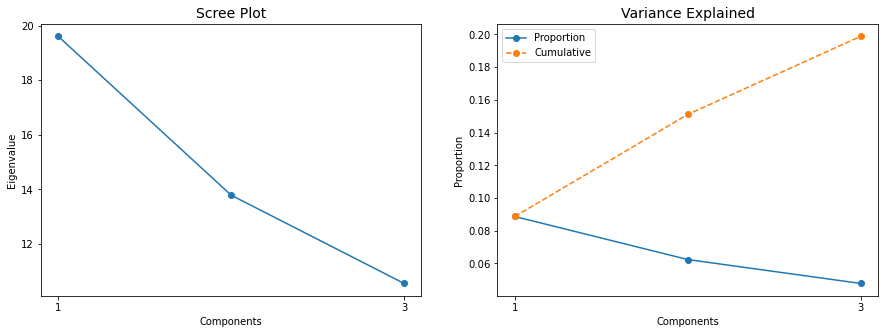

In [73]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [74]:
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP90C1,POP90C2,POP90C4,ETH3,ETH4,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHN2,HHN6,MARR2,MARR4,DW4,DW7,DW8,DW9,HU3,HU4,HU5,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC5,HVP1,HVP5,HUR1,RHP1,RHP4,HUPA3,HUPA4,HUPA5,HUPA7,RP4,MSA,ADI,DMA,IC1,IC6,IC9,IC10,IC14,IC16,IC17,IC22,HHAS1,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC1,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC2,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,MINRDATE,MAXRAMNT,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,PC0,PC1,PC0,PC1,PC2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,-0.019156,-0.274885,-0.146957,-0.034587,-0.1313,XXXX,T2,H,0.054029,F,0.171607,-0.356881,3,-0.206977,0.745798,-0.055596,0.011930,-0.240136,-0.350256,-0.320166,-0.299729,-0.09687,-0.420329,-0.383872,-0.393519,-0.351292,-0.229805,-0.306142,-0.28419,-0.404251,-0.147366,-0.351668,-0.127914,-0.105028,-0.076837,1.052458,-0.394185,-1.235273,0.684696,-0.217719,-0.223937,-0.411007,-0.318003,-0.178012,-0.241859,-0.243155,-0.249707,-0.199512,-0.058468,-0.233968,-0.102047,-0.449775,-1.043796,0.570857,1.027129,-0.197237,-1.051630,-0.427141,0.681650,0.275532,1.149868,0.486159,-0.076580,0.027298,-0.816497,-0.444526,-0.732814,0.882053,1.372488,-0.156494,0.465714,-0.519690,-0.321105,-0.353743,0.334768,-0.648917,-0.442066,0.035937,-0.054125,-0.453938,-0.435249,-0.909136,-0.510811,0.471801,-0.331514,-0.593674,0.364485,-0.565689,-0.533671,-0.145106,-1.232565,-0.075511,0.155099,-0.202946,-0.585640,0.626834,-0.098231,-0.191477,0.989500,0.990253,-0.483565,0.089193,-0.338264,0.471262,-0.147841,-0.904544,0.895769,-0.746148,-0.429073,-0.206928,-0.138679,-0.343702,-0.741218,0.202299,-0.203281,-0.278098,-1.164948,-0.618802,-0.864418,-0.627254,-0.128786,0.243106,0.939209,-1.401205,-0.717487,-0.622342,-1.344233,1.738274,0.107748,-1.133843,-0.421214,0.718882,-0.256270,0.028142,0.618443,2.160262,0.306458,0.086618,-0.292224,-0.827599,2.363671,-1.024576,-1.162464,0.849349,-0.634092,-0.184685,0.103889,-1.018332,1.099332,0.211809,-0.756187,-1.258025,-0.388224,0.700961,-0.528229,-0.525493,-0.191628,0.685501,-0.938287,-0.480644,-0.452344,0.873309,-0.374350,1.001517,0.029293,0.428334,-1.034951,0.332656,-0.27016,0.81935,-0.495530,-0.216497,0.737899,-0.780437,0.235691,0.521963,-0.901694,0.437362,0.122217,-0.344714,-0.636455,1.550839,-0.269449,-0.333052,0.045006,-0.322441,-0.362632,-0.462590,-0.193820,-0.277806,-0.743523,1.007809,-0.201563,-0.375798,0.779032,0.014260,0.167262,0.121198,0.336945,-0.093485,1.536476,0.402294,0.093516,0.315814,-0.356914,-0.385986,1.069709,-0.569963,-0.707898,-0.471679,-0.143765,-0.509344,1.866657,-0.598374,-0.382472,1.454234,0.313229,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-0

In [75]:
# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.drop_duplicates()
loadings
#acho que é para ficar assim literalmente e concatenar isto á df original

,PC0,PC0,PC1,PC1,PC2
NOEXCH,-0.000337,-0.000337,-0.003332,-0.003332,-0.000987
RECINHSE,-0.023870,-0.023870,0.012504,0.012508,0.061292
RECP3,-0.019402,-0.019402,-0.000313,-0.000310,0.021891
RECPGVG,-0.001869,-0.001869,0.009383,0.009384,0.012638
RECSWEEP,0.006685,0.006685,0.000709,0.000711,0.013221
INCOME,-0.385007,-0.385007,-0.027611,-0.027611,-0.012986
WEALTH1,-0.531488,-0.531488,-0.106042,-0.106042,0.021966
HIT,-0.060436,-0.060436,-0.013753,-0.013752,0.027561
MALEMILI,-0.016335,-0.016335,0.117221,0.117221,-0.093794
MALEVET,-0.083911,-0.083911,-0.378981,-0.378980,0.197758


In [76]:
#scatterplot of the PCAs

## 3) Clustering

In [69]:
data_clustering = data.copy()

In [70]:
data_clustering.shape

(95412, 284)

In [71]:
# Performing HC
#hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5)
#hc_labels = hclust.fit_predict(data_clustering[metric_features])
#hc_labels